# E-tivity: K-Nearest Neighbors

## Overview

The goal is to implement the K-nearest neighbors algorithm (a supervised machine learning algorithm) and apply it to a real dataset. Along the way you should familiarize yourself with some of the terminology you have read in the note. You will also get a chance to practice with Python and working with large datasets.


## Dataset introduction

The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

The dataset for this E-tivity is a set of handwritten digits from zip codes written on hand-addressed letters. The datasets is separated into “train” and “test”, and is available here:

<a href="https://web.stanford.edu/~hastie/ElemStatLearn//datasets/zip.train.gz">train dataset</a>  and 
<a href="https://web.stanford.edu/~hastie/ElemStatLearn//datasets/zip.test.gz">test dataset</a>

Read about this dataset by going to the Elements of Statistical Learning website, <a href="https://web.stanford.edu/~hastie/ElemStatLearn/">ESL</a>, then clicking on the `Data` tab, then clicking on the `Info` for the zip code dataset (the last dataset). 
    
![title](img/rmnist_10.png)

Use the command less in the terminal to view the beginning of each file. Both datasets have the same format: the first column is the "label" (or class) (here an integer between 0 and 9, inclusive, that corresponds to the identity of a hand-written zip code digit), and the rest of each row is made up of gray-scale values corresponding to the image of this hand-written digit.

One useful technique is to load a dataset from a file into a numpy array. Here is an example:

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [1]:
import numpy as np
train_data = np.loadtxt("train") #"path/to/train/file"
test_data  = np.loadtxt("test")

print(train_data.shape)
print(test_data.shape)

(7291, 257)
(2007, 257)


In [27]:
#Trying everything afresh
train_data = np.loadtxt("train") #"path/to/train/file"
test_data  = np.loadtxt("test")

X = train_data[:, 1:]
y = test_data[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [7291, 2007]

In [7]:
train_data #each row is a different image

array([[ 6.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 5.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
       [ 4.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       ...,
       [ 3.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 0.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

The first column is the class, it tells us which digit we will find in the image, as you can see hereafter for the first row (it is a 6):

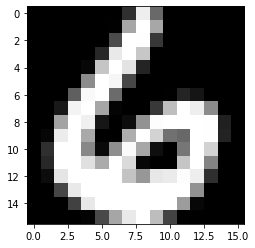

In [18]:
import matplotlib.pyplot as plt
row=0
flatten_image=train_data[row,1:] # each 16x16 image has been flatten into a vector
im=flatten_image.reshape(16,16)
#print(im)#as a matrix
plt.gray()
plt.imshow(im)#as an image

The test set is similar:

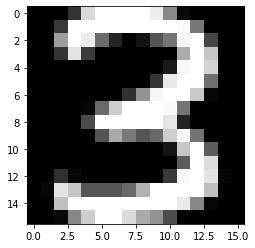

In [21]:
test_data
row = 2
flatten_image1=test_data[row,1:]
im1=flatten_image1.reshape(16,16)
plt.gray()
plt.imshow(im1)#as an image

## Step 2: Filter the Data
To start, we will just consider two classes, but here we have 10. We will get to such problems later, but for now, devise a way to retain only the rows which have label 2 or 3. Do this for both the train and test data.

One important note: it may be convenient to relabel the 2 to -1 and the 3 to +1, since this will work better with our methods later on (but you do not have to do this).


## Implement K-nearest neighbors

The main goal of the E-tivity is to implement the K-nearest neighbors classifier to predict the class of each example from the test dataset. Exactly how you implement this part is up to you, but your code should be decomposed into functions, well commented, and easy to understand. Here are some suggestions:

**Classification**
Create a function that takes as input the train set, (at least) a test example and an integer K, and outputs a prediction based on a nearest-neighbor classifier. This function will loop through all the training examples, find the distance between each one and the input test example, and then find the K nearest neighbors (you are welcome to use numpy sorting methods, but look up how they work first). For this subroutine, we will need a distance function. In practice, you have to implement the algorithm 3 in <a href="http://ciml.info/dl/v0_99/ciml-v0_99-ch03.pdf">Duame</a> (pag. 33).


You should implement a Python function like:

In [ ]:
#Classification problem
def classify(train, test, k):
    

## Example Implementation
Video Link: https://www.youtube.com/watch?v=6kZ-OPLNcgE

In [6]:
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
        

In [1]:
#Finding the distance between two instances
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [40]:
#Load Data method to load the iris.data 
import csv
import random
def loadDataset(filename, split, trainingSet=[], testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [7]:
#Trail of getNeighbor method
trainSet = [[2, 2, 2, 'a'],[4, 4, 4, 'b']]
trainInstance = [5,5,5]
k = 1
neighbors = getNeighbors(trainSet, trainInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


In [15]:
#Get response method implementation
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [16]:
#Trial
neighbors = [[1, 1, 1, 'a'], [2, 2, 2, 'a'], [3, 3, 3, 'b']]
response = getResponse(neighbors)
print(response)

a


In [25]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] in predictions[x]:
            correct += 1
    try:
        return (correct/float(len(testSet))) * 100.0
    except ZeroDivisionError:
        return 0
    

In [18]:
testSet = [[1, 1, 1, 'a'], [2, 2, 2, 'a'],[3, 3,3, 'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


In [54]:
def main():
    testSet = []
    trainingSet = []
    split = 0.67
    loadDataset('iris.data', split, trainingSet, testSet)
    print('Train Set: ', len(trainingSet))
    print('Test Set: ', len(testSet))
    #generate predictions
    predictions = []
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print(f"Predicted = {result}, Actual = {testSet[x][-1]}")
    accuracy = getAccuracy(testSet, predictions)
    print(f"Accuracy = {accuracy}%", )
main()

Train Set:  106
Test Set:  44
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-setosa, Actual = Iris-setosa
Predicted = Iris-versicolor, Actual = Iris-versicolor
Predicted = Iris-versicolor, Actual = Iris-versicolor
Predicted = Iris-versicolor, Actual = Iris-versicolor
Predicted = Iris-versicolor, Actual = Iris-versicolor
Predicted = Iris-versicolor, Actual = Iris-versicolor
Predicted 

# Alessio implementation of Iris (KNN)

In [2]:
from sklearn import datasets

#import some data
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

print(X[0:5, ])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [4]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

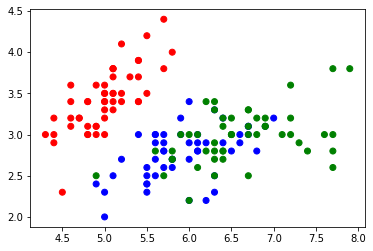

In [9]:
#Scatter plot
col = np.array(["red", "blue", "green"])
plt.scatter(X[:, 0],X[:,1],color=col[Y])

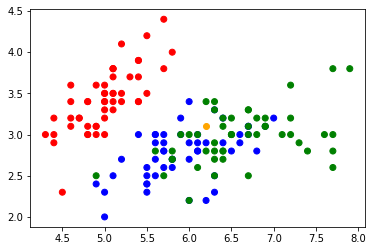

In [18]:
#Claasify the flower
col = np.array(["red", "blue", "green"])
plt.scatter(X[:,0], X[:,1], color=col[Y])
Xpred = np.array([[6.2, 3.1]])
plt.scatter(Xpred[:, 0], Xpred[:, 1], color="orange")

In [22]:
#KNN for Iris flower
def KNN(X, Y, Xpred, K=1):
    #distance between Xpred and X
    if (Xpred.shape[0] != 1) & (X.shape[1] != Xpred.shape[1]):
        raise("Error! Wrong dimension of X or Xpred")
    distance = np.sum((X-Xpred)**2, axis=1) #Broadcasting
    ind = np.argmin(distance)
    print("Closest Point has features: ", X[ind, :])
    return Y[ind]

In [23]:
KNN(X, Y, Xpred, K=1)

Closest Point has features:  [6.1 3. ]


1

In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(120, 2) (120,) (30, 2) (30,)


In [25]:
Ypred = []
for i in range(Xtest.shape[0]):
    ypred = KNN(Xtrain, ytrain, Xtest[[i], :], K=1)
    Ypred.append(ypred)

Closest Point has features:  [4.4 3. ]
Closest Point has features:  [6.5 3.2]
Closest Point has features:  [5.  3.5]
Closest Point has features:  [5.8 4. ]
Closest Point has features:  [4.7 3.2]
Closest Point has features:  [5.6 3. ]
Closest Point has features:  [6.5 3.2]
Closest Point has features:  [7.4 2.8]
Closest Point has features:  [5.6 2.7]
Closest Point has features:  [7.7 3. ]
Closest Point has features:  [4.6 3.2]
Closest Point has features:  [5.4 3.9]
Closest Point has features:  [5.1 3.8]
Closest Point has features:  [6.3 2.5]
Closest Point has features:  [4.6 3.2]
Closest Point has features:  [6.2 3.4]
Closest Point has features:  [4.9 2.4]
Closest Point has features:  [6.5 3. ]
Closest Point has features:  [6.3 3.3]
Closest Point has features:  [6.9 3.2]
Closest Point has features:  [6.7 3. ]
Closest Point has features:  [5. 3.]
Closest Point has features:  [5.5 2.4]
Closest Point has features:  [5.5 2.5]
Closest Point has features:  [7.7 3. ]
Closest Point has features:

In [26]:
np.array(Ypred)

array([0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0,
       1, 1, 2, 0, 1, 1, 2, 0])

In [27]:
ytest

array([0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 2, 0, 2, 2, 2, 0])

In [30]:
len(np.where(np.array(Ypred) - np.array(ytest)== 0)[0])/len(ytest)

0.7

In [ ]:
def KNN(train,test,K):
    #FILL IT
    
    return predicted_class_for_each_instance_in_test_set

**Distance function**
An important part of many machine learning methods is the concept of "distance" between examples. We often phrase this as a "metric" on our inputs. Create a function that takes as input two examples (any two examples, although in this case we will use it with one test and one train), and outputs the distance (we will use Euclidean for now) between them. Although there are many built-in functions the perform this task, please implement your distance function from scratch. However, you are welcome to use numpy functions as part of it (for example, you may use np.sum and similar functions, but look up how they work first).


**Quantify the accuracy**
Loop through all the filtered test examples, using your classification function to predict the label for each one. Also create a way of determining if the prediction was correct or not, based on the labels of the test data. Compute the fraction or percentage of correctly predicted examples. How does this change as $K$ varies? Try $K$ 1-10 (at least) and record the accuracy.



## Questions:
* What is the accuracy of KNN in the test set for K=1?
* What is the accuracy of KNN in the test set for K=2?
* What is the accuracy of KNN in the test set for K=3?
* ...
* What is the accuracy of KNN in the test set for K=10?

## In depth questions

* Extend your algorithm to a multi-class setting (i.e. distinguish between 3 or more digits). How does this change your best value of K?
* If you are familiar with confusion matrices, create one for this test dataset and your “best” value of K.
* Create a plot of accuracy vs. K.
* Visualize some of the examples that were classified incorrectly. The examples are 16x16 gray-scale images, so you can plot them on a grid.

**Analysis Questions**

* What values of k did you try?
* Which value of k produced the highest accuracy? What general trends did you observe as k increased?
* When using the entire training dataset, what are your observations about the runtime of K-nearest neighbors? List 1-2 ideas for making this algorithm faster.
